# Neural Networks : TP 1 - Lucas Maiz DE2

## Classifications of clothes/shoes

### Setup
The first step is to activate tensorflow and to import libraries that will be used in the rest of the work 

In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

#Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Load the data
The second step is to load the data. Here we're using the fashion_mnist dataset that is included into keras datasets. 

In [3]:
fashion_mnist_train = pd.read_csv("../../fashion-mnist-train-2.csv")
#fashion_mnist_train = pd.read_csv("../../fashion-mnist-train-1.csv")
fashion_mnist_test = pd.read_csv("../../fashion-mnist_test.csv")

In [9]:
fashion_mnist_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
import numpy as np

def df_to_3D_array(df):
    # convertir les lignes en tableaux 2D en excluant la première colonne
    labels  = df["label"].tolist()

    df_2D = df.iloc[:,1:].apply(lambda x: x.values.reshape(28,28), axis=1)

    # convertir les tableaux 2D en un tableau 3D
    return np.array(df_2D.tolist()), np.array(labels)


In [14]:
fashion_mnist_train.head(1)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_mnist_3D_data, fashion_mnist_3D_labels  = df_to_3D_array(fashion_mnist_train)
fashion_mnist_test_data, fashion_mnist_test_label = df_to_3D_array(fashion_mnist_test)

In [6]:
class_names = ["T-shirt/top",
              "Trouser",
              "Pullover",
              "Dress",
              "Coat",
              "Sandal",
              "Shirt",
              "Sneaker",
              "Bag",
              "Ankle boot"]

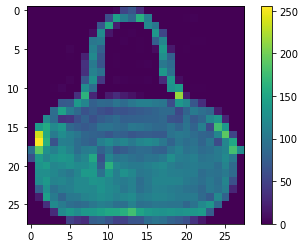

'Bag'

In [7]:
index = 20
plt.figure()
plt.imshow(fashion_mnist_3D_data[index])
plt.colorbar()
plt.grid(False)
plt.show()

class_names[fashion_mnist_3D_labels[index]]

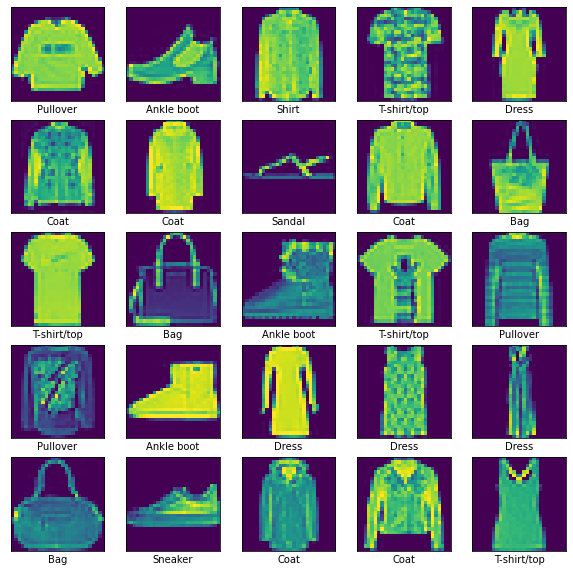

In [12]:
plt.figure(figsize=(10,10))
for i in range(0,25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(fashion_mnist_3D_data[i])
  plt.xlabel(class_names[fashion_mnist_3D_labels[i]])

plt.show()

### Normalization
As we saw, each pixel is represented by a pixel-value between 0 and 255. It will be interesting for the rest of this work to normalize those pixel values. That's why we want pixel value between 0 and 1 instead of 0 and 255

In [7]:
train_images_before = fashion_mnist_3D_data
test_images_before = fashion_mnist_test_data

In [8]:
train_images = fashion_mnist_3D_data / 255
test_images = fashion_mnist_test_data / 255

### Creation and fitting of the model
Now we know the kind of data we have, we can create our model. In our work we have a model with 3 layers. In order to train the model we use train_images and train_labels.

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(train_images.shape[1:])),
    #Flatten  => transforms the format of the images from a two-dimensionnal array to a one dimensional array
    keras.layers.Dense(128, activation='relu'),
    #128 nodes 
    keras.layers.Dense(10, activation='softmax')
    # return an array of 10 probability
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(train_images, fashion_mnist_3D_labels, epochs=10)

Epoch 1/10
938/938 [==============================] - 4s 3ms/step - loss: 0.5692 - accuracy: 0.7997
Epoch 2/10
938/938 [==============================] - 4s 5ms/step - loss: 0.4168 - accuracy: 0.8488
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3754 - accuracy: 0.8651
Epoch 4/10
938/938 [==============================] - 6s 6ms/step - loss: 0.3455 - accuracy: 0.8759
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3258 - accuracy: 0.8806
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3046 - accuracy: 0.8895
Epoch 7/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2919 - accuracy: 0.8916
Epoch 8/10
938/938 [==============================] - 6s 7ms/step - loss: 0.2759 - accuracy: 0.8979
Epoch 9/10
938/938 [==============================] - 5s 6ms/step - loss: 0.2660 - accuracy: 0.9016
Epoch 10/10
938/938 [==============================] - 6s 7ms/step - loss: 0.2539 - accuracy: 0.9062

In [13]:
test_loss, test_acc = model.evaluate(test_images, fashion_mnist_test_label, verbose=2)

313/313 - 1s - loss: 0.3181 - accuracy: 0.8857 - 1s/epoch - 5ms/step


### Use of the model
Once we created the model we can use it in order to predict results. In this way we use test_images in order to predict the label.

In [14]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [15]:
predictions[24]

array([1.45567105e-08, 1.27128127e-10, 3.06451852e-07, 2.98524955e-11,
       1.54534359e-06, 9.99996185e-01, 8.25845703e-09, 6.92692254e-07,
       1.14628028e-06, 2.30138819e-09], dtype=float32)

In [16]:
np.argmax(predictions[24])

5

### Final result
In this last part the goal is to print the image with the label predicted by the model and the percentage of this prediction. When the prediction is good the legend is printed in blue, otherwise in red.

In [18]:
def plot_images(i, predictions_array, true_label, img):
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% {}".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color=color)

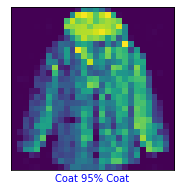

array([1.1520674e-04, 2.2133775e-02, 3.7730157e-03, 1.7933997e-03,
       9.5369947e-01, 8.2614463e-07, 1.7381569e-02, 1.4408499e-07,
       1.0975982e-03, 4.9617870e-06], dtype=float32)

In [19]:
i = 27
plt.figure(figsize=(6,3))
plot_images(i, predictions[i], fashion_mnist_test_label[i], test_images[i])
plt.show()
predictions[i]

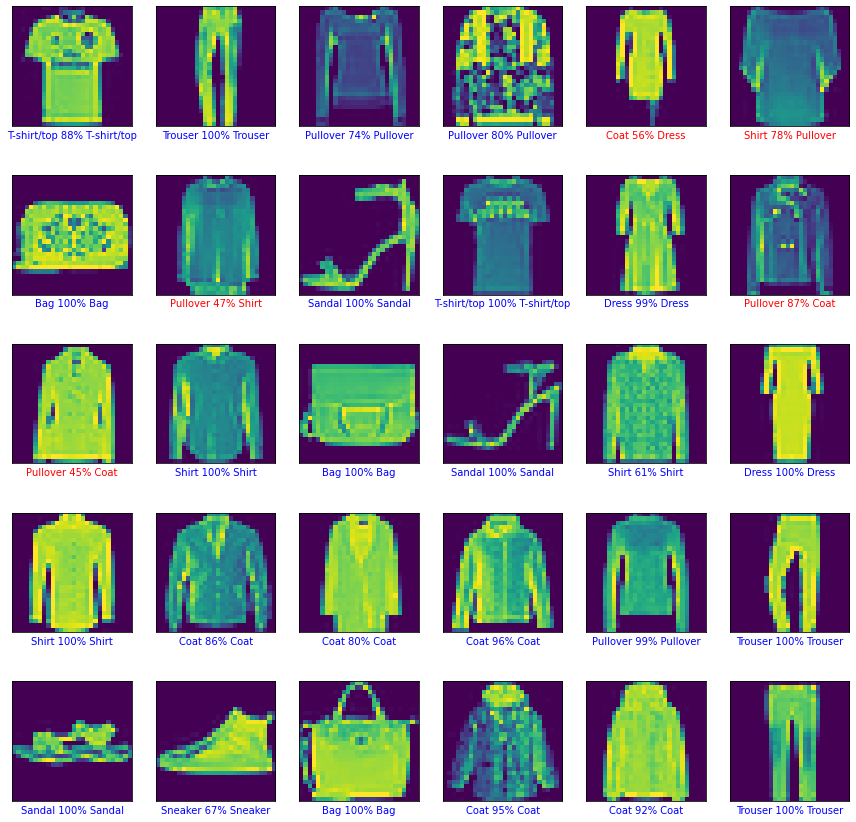

In [20]:
plt.figure(figsize=(15,15))
for i in range(0,30):
  plt.subplot(5,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plot_images(i, predictions[i], fashion_mnist_test_label[i], test_images[i])

plt.show()

In [17]:
model.save("../models/my_h5_model.h5")